Perform the necessary imports

In [3]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.python.keras.preprocessing import text, sequence
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Activation, Dropout, Dense
from sklearn.model_selection import train_test_split
#import keras

****************************************************************************************************

So, here's what we'll do.

1.Understand the data using visualization

2.Use pandas to do data manipulation such as fill NaNs', drop redundant training examples, generate labels etc.,

3.Convert the text into a sequence(list of lists(sequence)), using tokenizer. Pad the sequence to form a 2D numpy array.

4.Build the Neural Network Model using Keras.

5.Train the model using an optimizer such as 'adam' or 'adagrad' and loss function 'binary_crossentropy'. 

6.Start predicting!

****************************************************************************************************

1.Data visualization and 
2.Use pandas to do data manipulation such as fill NaNs', drop redundant training examples, generate labels etc.,

In [4]:
df = pd.read_csv('data/text_emotion_train_val_set.csv')
df.head()

,tweet_id,sentiment,author,content
0,1956967341,empty,xoshayzers,@tiffanylue i know i was listenin to bad habi...
1,1956967666,sadness,wannamama,Layin n bed with a headache ughhhh...waitin o...
2,1956967696,sadness,coolfunky,Funeral ceremony...gloomy friday...
3,1956967789,enthusiasm,czareaquino,wants to hang out with friends SOON!
4,1956968416,neutral,xkilljoyx,@dannycastillo We want to trade with someone w...


In [5]:
df = df.loc[df['sentiment'].isin(['happiness','sadness','surprise','hate','love'])]

In [6]:
print(len(df))
print(type(df))
print(df.ndim)
print(df.shape)
print(df.dtypes)
print(df.size)

17726
<class 'pandas.core.frame.DataFrame'>
2
(17726, 4)
tweet_id      int64
sentiment    object
author       object
content      object
dtype: object
70904


Dropping unnecessary layers that do not contribute to emotion classification

In [7]:
df = df.drop(['tweet_id', 'author'], axis=1)

In [8]:
df.head()

,sentiment,content
1,sadness,Layin n bed with a headache ughhhh...waitin o...
2,sadness,Funeral ceremony...gloomy friday...
6,sadness,"I should be sleep, but im not! thinking about ..."
8,sadness,@charviray Charlene my love. I miss you
9,sadness,@kelcouch I'm sorry at least it's Friday?


In [9]:
df.shape

(17726, 2)

Check the frequency/no. of times different emotions are labelled

In [10]:
df['sentiment'].value_counts()

happiness    5209
sadness      5165
love         3842
surprise     2187
hate         1323
Name: sentiment, dtype: int64

It is not a skewed data set for the 'sentiment' feature.
Becasue 'sentiment' is not  a feature. It is the label(y)
Plotting the above output as a bar graph

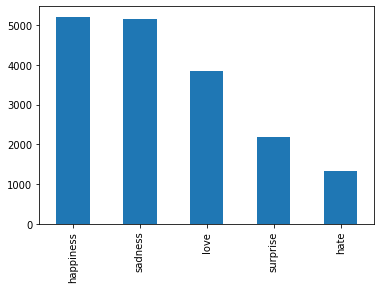

In [11]:
df['sentiment'].value_counts().plot.bar()

Plotting the same output for percentage visualization.
It says that 21.5% of the data set are neutral features

In [12]:
df['sentiment'].value_counts() / len(df)

happiness    0.293862
sadness      0.291380
love         0.216744
surprise     0.123378
hate         0.074636
Name: sentiment, dtype: float64

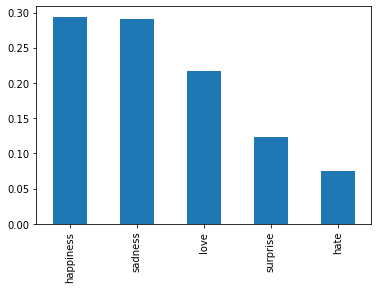

In [13]:
(df['sentiment'].value_counts() / len(df)).plot.bar()

In [14]:
np.where(pd.isnull(df))

(array([], dtype=int64), array([], dtype=int64))

Relieved that there isn't. 

the '.sample' method randomly shuffles the data frame. 'frac=1' indicates that the entire fraction of data is to be considered after shuffling. 'reset_index' resets the row indexes after shuffling. drop=True makes sure that the old index values are not retained in the data frrame.

In [15]:
print(df.head())
df = df.sample(frac=1).reset_index(drop=True)
print(df.shape)
df.head()

  sentiment                                            content
1   sadness  Layin n bed with a headache  ughhhh...waitin o...
2   sadness                Funeral ceremony...gloomy friday...
6   sadness  I should be sleep, but im not! thinking about ...
8   sadness            @charviray Charlene my love. I miss you
9   sadness         @kelcouch I'm sorry  at least it's Friday?
(17726, 2)


,sentiment,content
0,sadness,George is sad because he can't go for a car ri...
1,happiness,"@cybercabz i'll take a lookie, sound great"
2,sadness,"@lil_kimmeh Me too, I miss it. I, however, wi..."
3,love,@kristensaywhaa Good deal! Im doing good thank...
4,hate,"@thebookpolice actually, in Sweden the IKEA's ..."


Generate labels from the data set column 'sentiment'

In [16]:
y_pandas_df = pd.get_dummies(df['sentiment'])
print(type(y_pandas_df))
print(y_pandas_df.shape)
print(y_pandas_df.ndim)
y_pandas_df.head()

<class 'pandas.core.frame.DataFrame'>
(17726, 5)
2


,happiness,hate,love,sadness,surprise
0,0,0,0,1,0
1,1,0,0,0,0
2,0,0,0,1,0
3,0,0,1,0,0
4,0,1,0,0,0


In [17]:
y = y_pandas_df.values
print("properties of y")
print("type : {}, dimensions : {}, shape : {}, total no. of elements : {}, data type of each element: {}, size of each element {} bytes".format(type(y), y.ndim, y.shape, y.size, y.dtype, y.itemsize))

properties of y
type : <class 'numpy.ndarray'>, dimensions : 2, shape : (17726, 5), total no. of elements : 88630, data type of each element: uint8, size of each element 1 bytes


In [20]:
x_train, x_test, y_train, y_test = train_test_split(df,y, random_state=4, test_size=0.2)

In [21]:
x_train = x_train.drop(['sentiment'], axis=1)
x_test = x_test.drop(['sentiment'], axis=1)

Flatten the array from 2D to 1D.

In [22]:
x_train = x_train.values.flatten()
print(x_train.shape)
x_test = x_test.values.flatten()
print(x_test.shape)

(14180,)
(3546,)


In [23]:
print(x_train)
print("properties of x_train")
print("type : {}, dimensions : {}, shape : {}, total no. of elements : {}, data type of each element: {}, size of each element {} bytes".format(type(x_train), x_train.ndim, x_train.shape, x_train.size, x_train.dtype, x_train.itemsize))

['my day has been so crappy that i just want to cry.'
 "still can't figure this twitter thing out, i can't my background pic to stick and i can't seem to change my profile pic"
 'listening to the best days of your life by kellie pickler' ...
 'my roommate @tess_tickle loves to ignore me'
 "Ahhh I'm engulfed in shooooes. Who told me to buy so maany damn shoes"
 'happy maders day']
properties of x_train
type : <class 'numpy.ndarray'>, dimensions : 1, shape : (14180,), total no. of elements : 14180, data type of each element: object, size of each element 8 bytes


In [24]:
print(x_test)
print("properties of x_test")
print("type : {}, dimensions : {}, shape : {}, total no. of elements : {}, data type of each element: {}, size of each element {} bytes".format(type(x_test), x_test.ndim, x_test.shape, x_test.size, x_test.dtype, x_test.itemsize))

["@agoodeye I am soooo disapoointed I couldn't make it  I will be there next time! Glad it was productive."
 'but now i have no money for a phone'
 '@natsnapper haha. Booked my lie in last night. Just woke up. Must have needed it!!'
 ... 'My mom was happy with my present  yayy'
 '@FragDolls ok I just love it when big buff tattoed (preferably Christian)  men strut...fluffy dogs are optional'
 "@miraihl Sounds like you're in for a great day!  Enjoy"]
properties of x_test
type : <class 'numpy.ndarray'>, dimensions : 1, shape : (3546,), total no. of elements : 3546, data type of each element: object, size of each element 8 bytes


Necessary Global Variables.

In [25]:
list_of_classes = ['happiness','sadness','surprise','hate','love']
max_features = 20000
max_text_length = 400
embedding_dims = 50
batch_size = 32
epochs = 3
num_filters_1 = 250
num_filters_2 = 250
filter_size = 3

3.Convert the text into a sequence(list of lists(sequence)), using tokenizer. Pad the sequence to form a 2D numpy array.

In [26]:
x_tokenizer = text.Tokenizer(num_words=max_features)
x_tokenizer.fit_on_texts(list(x_train))
x_tokenized = x_tokenizer.texts_to_sequences(x_train)
x_train= sequence.pad_sequences(x_tokenized, maxlen=max_text_length)

4.Build the Neural Network Model using Keras.

In [27]:
model = Sequential()

model.add(Embedding(max_features, embedding_dims, input_length=max_text_length))
model.add(Dropout(0.2))

model.add(Conv1D(filters=num_filters_1, kernel_size=filter_size, padding='valid', activation='relu', strides=1))
model.add(GlobalMaxPooling1D())

model.add(Dense(num_filters_2))
model.add(Dropout(0.2))
model.add(Activation('relu'))

model.add(Dense(5))
model.add(Activation('sigmoid'))


Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


5.Train the model using an optimizer such as 'adam' or 'adagrad' and loss function 'binary_crossentropy'. 

In [28]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 400, 50)           1000000   
_________________________________________________________________
dropout (Dropout)            (None, 400, 50)           0         
_________________________________________________________________
conv1d (Conv1D)              (None, 398, 250)          37750     
_________________________________________________________________
global_max_pooling1d (Global (None, 250)               0         
_________________________________________________________________
dense (Dense)                (None, 250)               62750     
_________________________________________________________________
dropout_1 (Dropout)          (None, 250)               0         
____________________________

In [29]:
model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs)

Epoch 1/3
14180/14180 [==============================] - 254s 18ms/sample - loss: 0.4418 - acc: 0.8119
Epoch 2/3
14180/14180 [==============================] - 193s 14ms/sample - loss: 0.3730 - acc: 0.8385
Epoch 3/3
14180/14180 [==============================] - 261s 18ms/sample - loss: 0.3022 - acc: 0.8741


In [32]:
#model.save('emo_class_keras_model.h5')

6.Start predicting!

In [33]:
#model = tf.keras.models.load_model ('emo_class_keras_model.h5')

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Performance on test set

In [30]:
x_tokenizer.fit_on_texts(list(x_test))
x_tokenized = x_tokenizer.texts_to_sequences(x_test)
x_test= sequence.pad_sequences(x_tokenized, maxlen=max_text_length)

In [31]:
model.evaluate(x_test,y_test)[1]

3546/3546 [==============================] - 10s 3ms/sample - loss: 0.5625 - acc: 0.7681


0.76813304

Get the class of prediction

In [97]:
list_of_classes = ['happiness','sadness','surprise','hate','love']

In [33]:
def predict(string):
    test = [string]
    string_tokenized = x_tokenizer.texts_to_sequences(test)
    x_testing = sequence.pad_sequences(string_tokenized, maxlen=max_text_length)
    y_testing = model.predict(x_testing, verbose = 1)
    y_class = list_of_classes[y_testing.argmax()]
    return y_class

In [34]:
predict('I am happy today')

1/1 [==============================] - 0s 262ms/sample


'happiness'